<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/ex1_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libs from Python
import pandas as pd
import numpy as np

#scykit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline

#Warning Filter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# name columns and load txt
colunas = ['ESCT','NDEP','RENDA','TIPOR','VBEM','NPARC','VPARC','TEL','IDADE','RESMS','ENTRADA','CLASSE']
df = pd.read_csv('credtrain.txt',sep="\t", names=colunas)
df_test = pd.read_csv('credtest.txt',sep="\t", names=colunas)


In [3]:
# show head of the dataframe
df.head()


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [4]:
# show some statistic values
df.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [5]:
# show unique values from df, preparation to preprocessing
df.nunique()

ESCT         4
NDEP         8
RENDA      516
TIPOR        2
VBEM       515
NPARC       16
VPARC      216
TEL          2
IDADE       52
RESMS       54
ENTRADA    127
CLASSE       2
dtype: int64

In [6]:
# transform value from categorigal columns to 0/1

df = pd.get_dummies(df, columns=['ESCT'], prefix = ['ESCT'])
df = pd.get_dummies(df, columns=['TEL'], prefix = ['TEL'])
df = pd.get_dummies(df, columns=['TIPOR'], prefix = ['TIPOR'])

df_test = pd.get_dummies(df_test, columns=['ESCT'], prefix = ['ESCT'])
df_test = pd.get_dummies(df_test, columns=['TEL'], prefix = ['TEL'])
df_test = pd.get_dummies(df_test, columns=['TIPOR'], prefix = ['TIPOR'])


array([[<Axes: title={'center': 'NDEP'}>,
        <Axes: title={'center': 'RENDA'}>,
        <Axes: title={'center': 'VBEM'}>,
        <Axes: title={'center': 'NPARC'}>],
       [<Axes: title={'center': 'VPARC'}>,
        <Axes: title={'center': 'IDADE'}>,
        <Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>],
       [<Axes: title={'center': 'CLASSE'}>,
        <Axes: title={'center': 'ESCT_0'}>,
        <Axes: title={'center': 'ESCT_1'}>,
        <Axes: title={'center': 'ESCT_2'}>],
       [<Axes: title={'center': 'ESCT_3'}>,
        <Axes: title={'center': 'TEL_0'}>,
        <Axes: title={'center': 'TEL_1'}>,
        <Axes: title={'center': 'TIPOR_0'}>],
       [<Axes: title={'center': 'TIPOR_1'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

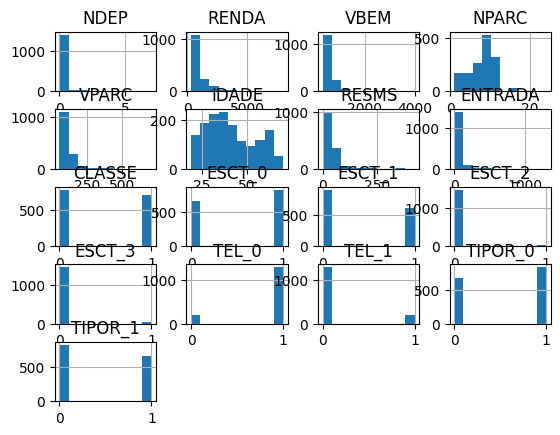

In [7]:
# plot df histogram
df.hist()

In [8]:
seed = 999

# Split the train dataset into features (X) and the target variable (y)
X_train = df.drop('CLASSE', axis=1)
y_train = df['CLASSE']

# Split the test dataset into features (X) and the target variable (y)

X_test = df_test.drop('CLASSE', axis=1)
y_test = df_test['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


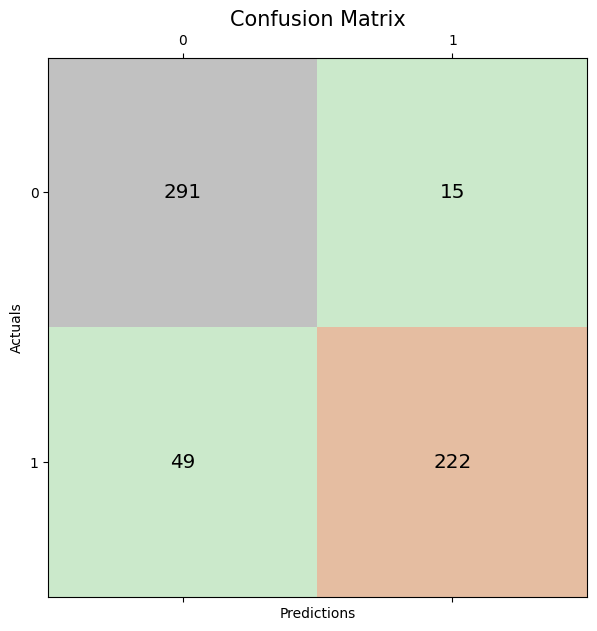

Accuracy: 88.91%
Confusion Matrix:
 [[291  15]
 [ 49 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.94      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.89      0.89      0.89       577



In [9]:
# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


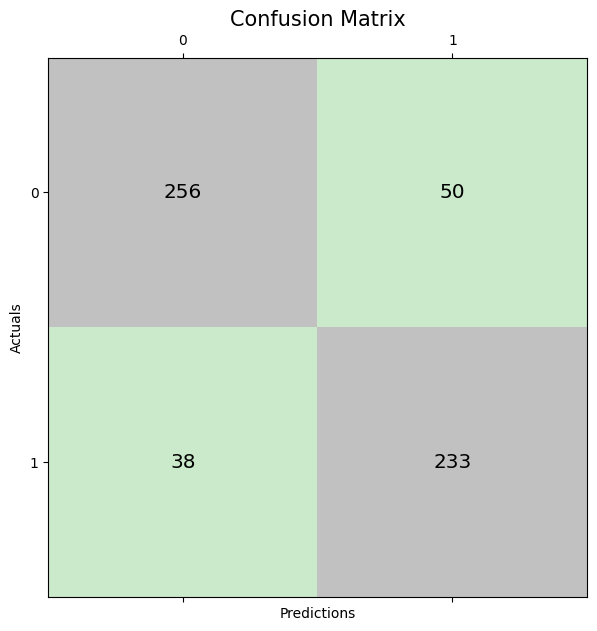

Accuracy: 84.75%
Confusion Matrix:
 [[256  50]
 [ 38 233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       306
           1       0.82      0.86      0.84       271

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577



In [10]:
# Create and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


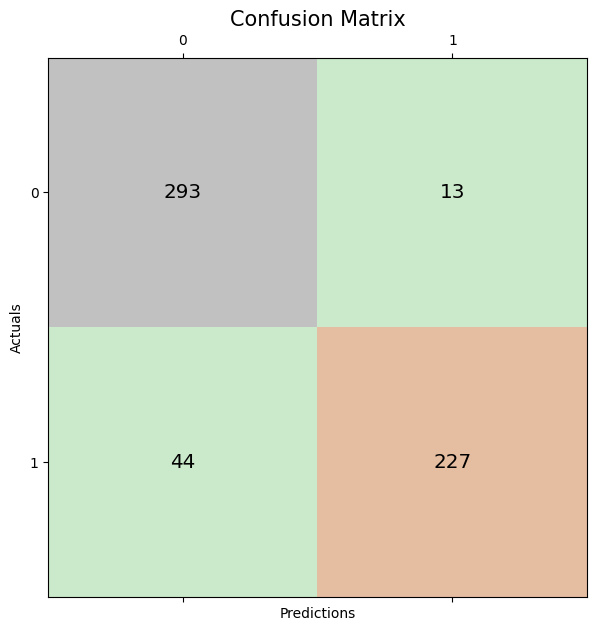

Accuracy: 90.12%
Confusion Matrix:
 [[293  13]
 [ 44 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       306
           1       0.95      0.84      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



In [11]:
# Create and train the Random Forest model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


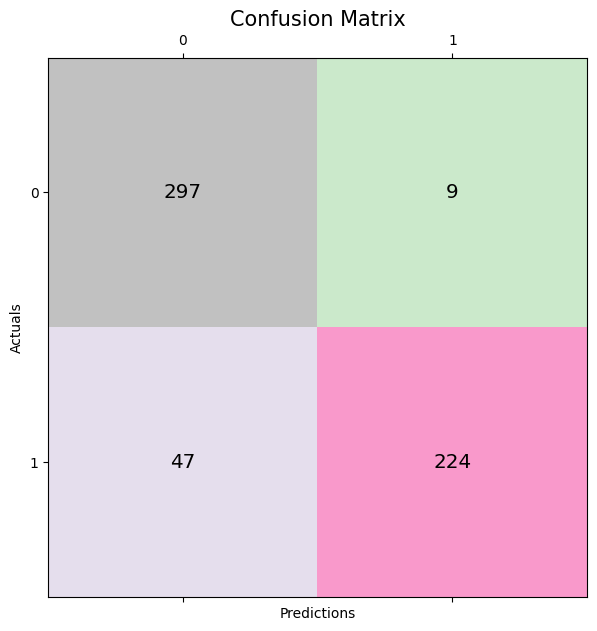

Accuracy: 90.29%
Confusion Matrix:
 [[297   9]
 [ 47 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.96      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



In [12]:
# Create and train the KNeighborsClassifier model
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)